In [1]:
import sparse
import numpy as np
import pandas as pd
import igraph as ig

In [2]:
df = pd.read_csv('../../share/trees/tree_B10_cycle_030405.csv').astype(np.float32)
df

,cycle,is_terminal,is_apical,appearance_month,ancestor_nature,ancestor_is_apical,id,parent_id
0,3.0,0.0,1.0,NaN,NaN,NaN,0.0,NaN
1,3.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0
2,3.0,0.0,0.0,NaN,NaN,NaN,2.0,1.0
3,3.0,0.0,0.0,NaN,NaN,NaN,3.0,2.0
4,3.0,1.0,1.0,NaN,NaN,NaN,4.0,3.0
...,...,...,...,...,...,...,...,...
1442,5.0,1.0,0.0,8.0,2.0,1.0,1442.0,1411.0
1443,5.0,1.0,0.0,8.0,2.0,1.0,1443.0,1404.0
1444,5.0,1.0,0.0,8.0,2.0,1.0,1444.0,1404.0
1445,5.0,1.0,0.0,8.0,1.0,1.0,1445.0,1406.0


In [3]:
coords = df[['parent_id', 'id',]][pd.notna(df['parent_id']) & (df['cycle'] < 4)].values.astype(np.int32)
coords.T

array([[   0,    1,    2,    3,    2,    5,    6,    5,    8,    5,   10,
          10,   10,   10,   10,   10,    1,   17,   18,   19,   19,   18,
          22,   22,   22,   22,   22,   17,   28,   29,   29,   29,   29,
          29,   29,   17,   36,   36,   38,   36,   40,   17,   42,   43,
          42,   45,   42,   47,   42,   49,   42,   51,   51,   51,   51,
          51,   51,    0,  337,  338,  339,  337,  341,  342,  343,  343,
         343,  343,  341,  348,  349,  348,  351,  348,  353,  353,  348,
         356,  348,  348,  359,  359,  359,  359,    0,  567,  568,  569,
         570,  570,  570,  567,  574,  575,  574,  574,  574,  579,  580,
         579,  582,  582,  582,  582,  574,  587,  588,  587,  590,  590,
         590,  590,  590,    0,  710,  711,  712,  712,  712,  711,  716,
         717,  718,  717,  720,  717,  722,  722,  722,  722,  722,  716,
         728,  729,  729,  729,  716,  733,  734,  733,  736,  733,  738,
         738,  738,  738,  738,  738, 

In [4]:
adjacency = sparse.COO(coords.T, data=1, shape=(np.max(coords) + 1, np.max(coords) + 1))
adjacency

Format,coo
Data Type,int64
Shape,"(1416, 1416)"
nnz,238
Density,0.00011869992658559163
Read-only,True
Size,5.6K
Storage ratio,0.0


In [16]:
ig.Graph.Adjacency(adjacency.to_scipy_sparse())

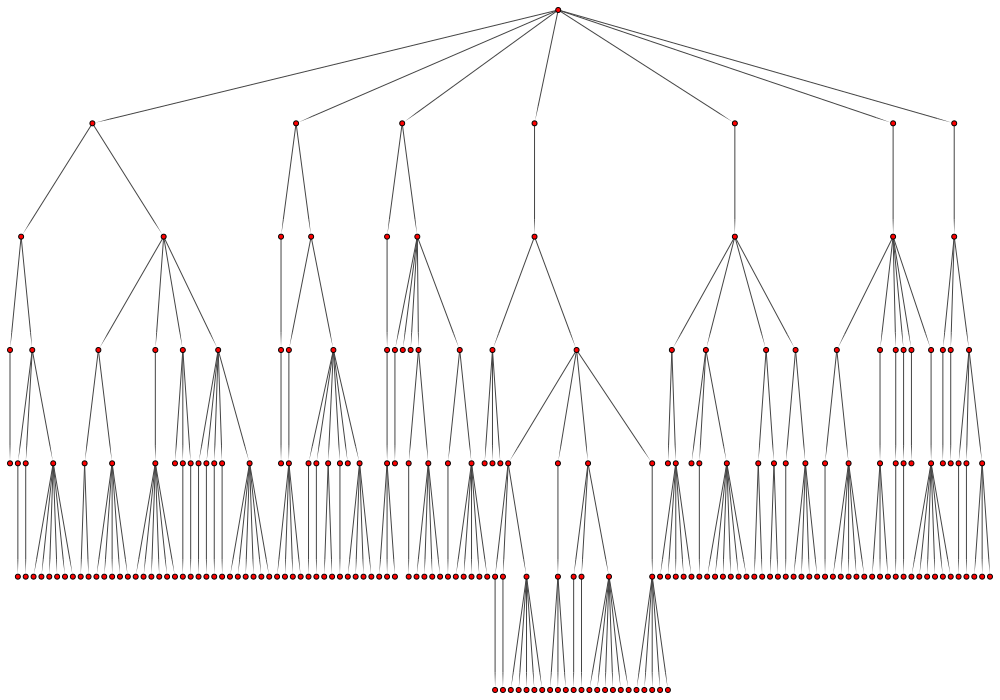

In [19]:
g = ig.Graph.Adjacency(adjacency.to_scipy_sparse())
assert g.is_dag()
components = g.components(mode=1)
subgraph = g.induced_subgraph(components[np.argmax(components.sizes())])
layout = subgraph.layout_reingold_tilford()
layout.rotate(180)
ig.plot(subgraph, layout=subgraph.layout_reingold_tilford(), bbox=(1000, 700), margin=(10, 10, 10, 10), **{
    'vertex_size': 5,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1
})

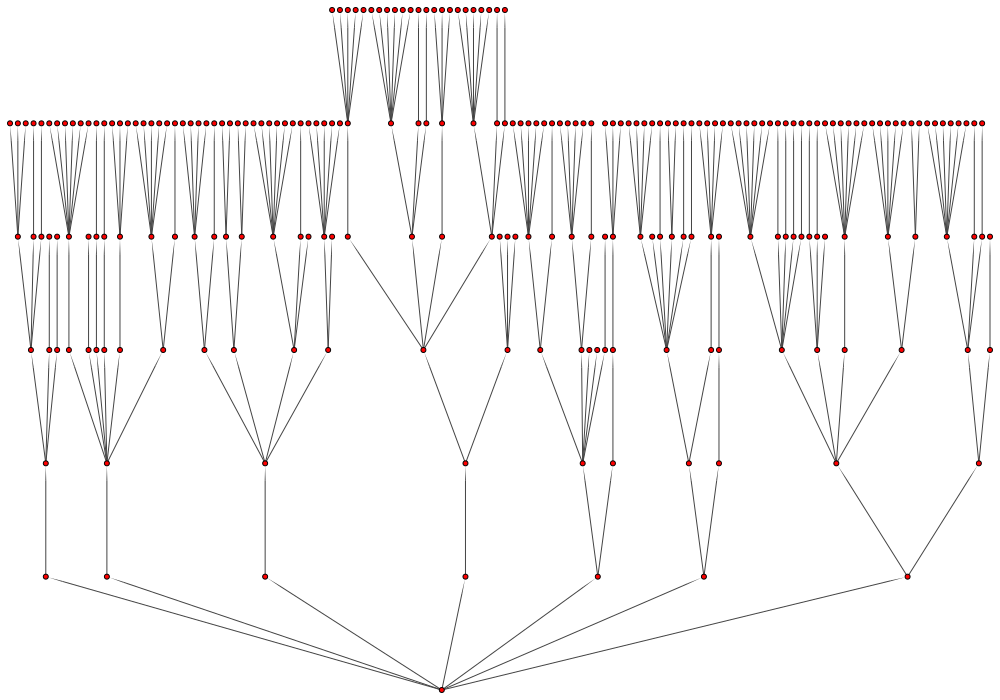

In [6]:
layout = subgraph.layout_reingold_tilford()
layout.rotate(180)
ig.plot(subgraph, layout=layout, bbox=(1000, 700), margin=(10, 10, 10, 10), **{
    'vertex_size': 5,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1
})

In [7]:
edges = df[['parent_id', 'id']][(df['cycle'] < 4)]
vertices = df[['id', 'cycle', 'is_apical', 'appearance_month', 'ancestor_nature', 'ancestor_is_apical']][(df['cycle'] < 4)]

In [8]:
vertices

,id,cycle,is_apical,appearance_month,ancestor_nature,ancestor_is_apical
0,0.0,3.0,1.0,NaN,NaN,NaN
1,1.0,3.0,0.0,NaN,NaN,NaN
2,2.0,3.0,0.0,NaN,NaN,NaN
3,3.0,3.0,0.0,NaN,NaN,NaN
4,4.0,3.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1411,1411.0,3.0,1.0,NaN,NaN,NaN
1412,1412.0,3.0,1.0,NaN,NaN,NaN
1413,1413.0,3.0,0.0,NaN,NaN,NaN
1414,1414.0,3.0,0.0,NaN,NaN,NaN


In [9]:
edges

,parent_id,id
0,NaN,0.0
1,0.0,1.0
2,1.0,2.0
3,2.0,3.0
4,3.0,4.0
...,...,...
1411,1410.0,1411.0
1412,1407.0,1412.0
1413,1412.0,1413.0
1414,1412.0,1414.0


In [10]:
G = ig.Graph.DictList(
          vertices=vertices.to_dict('records'),
          edges=edges.to_dict('records'),
          directed=True,
          vertex_name_attr='id',
          edge_foreign_keys=('parent_id', 'id'));

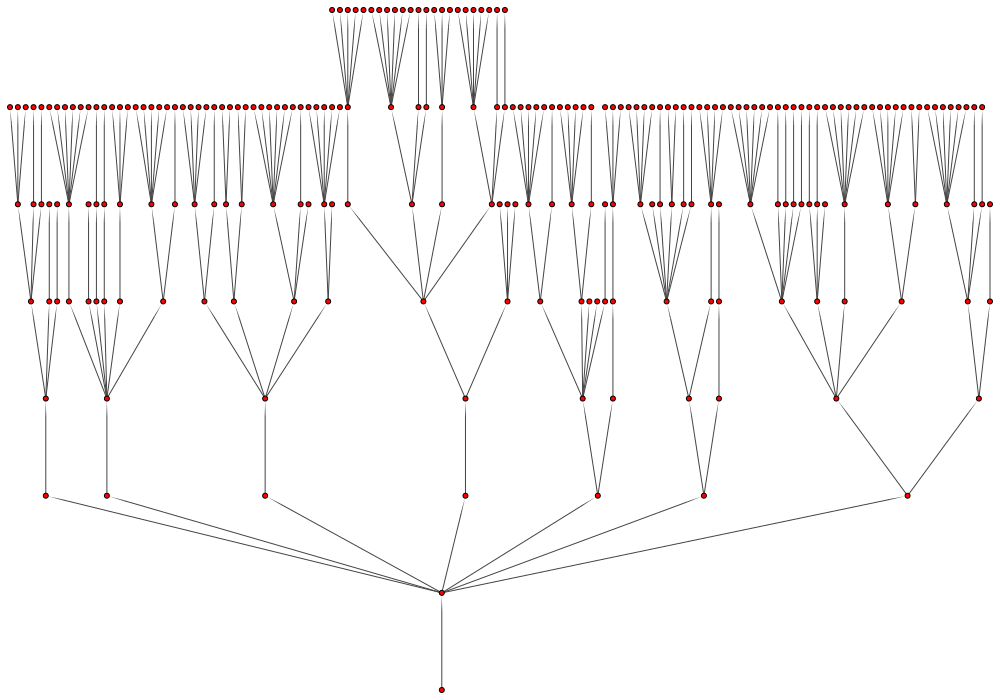

In [11]:
layout = G.layout_reingold_tilford()
layout.rotate(180)
ig.plot(G, layout=layout, bbox=(1000, 700), margin=(10, 10, 10, 10), **{
    'vertex_size': 5,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1
})

In [12]:
G.vs.get_attribute_values('is_apical')

[1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0

In [15]:
len(G.vs)

240

In [14]:
l.update({1:1})

NameError: name 'l' is not defined

In [ ]:
l

In [ ]:
np.array(G.get_adjacency().data)

In [ ]:
len(G.vs.indices)

In [ ]:
adj = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 0]
])

In [ ]:
np.argwhere(adj)

In [ ]:
np.argwhere(adj)[:, 0]

In [ ]:
ap = np.array([1,0,0])

In [ ]:
ap[np.argwhere(adj)[:, 0]]

In [ ]:
np.argwhere(adj)[:, 1]

In [ ]:
df[(df['cycle'] < 4)]['is_apical'].values

In [ ]:
ig.__version__